<a href="https://colab.research.google.com/github/Yukkitsune/TBank-Analytics/blob/main/Machine%20learning/knn_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №1: Метод K-ближайших соседей (KNN)

**Цель:**  
1. Освоить работу алгоритма KNN для задач многоклассовой классификации и регрессии.  
2. Научиться рассчитывать и интерпретировать метрики качества.  


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score,
)


## Задача 1. KNN для многоклассовой классификации

1 (1 балл). Выберите набор данных из датасетов sklean с несколькими классами (например, `Iris` или `Wine` – оба датасета импортированы в предыдущей ячейке).  
2 (1 балл). Разделите данные на обучающую и тестовую выборки.    
3 (1 балл). Обучите модель `KNeighborsClassifier`.  
4 (1 балл). Постройте confusion_matrix.

5 (1 балл). Посчитайте метрики оценки качества для задач классификации: accuracy, precision, recall, f1-score и сделайте выводы о качестве модели.  

In [2]:
# Сюда нужно написать код решения задания
wine_dataset = load_wine()

X_train, X_test, y_train, y_test = train_test_split(
    wine_dataset.data,
    wine_dataset.target,
    test_size=0.2,
    random_state=42,
    stratify=wine_dataset.target
    )

knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_3.fit(X_train, y_train)

knn_model_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_5.fit(X_train, y_train)

knn_model_10 = KNeighborsClassifier(n_neighbors=10)
knn_model_10.fit(X_train, y_train)

knn_model_30 = KNeighborsClassifier(n_neighbors=30)
knn_model_30.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [3]:
def print_metrics(model, X_test, y_test, model_name):
  y_pred = model.predict(X_test)
  print(f'Metrics for {model_name}')
  cm = confusion_matrix(y_test, y_pred)
  print(f"Confusion Matrix\n{cm}\n")
  print('Classification Report')
  print(classification_report(y_test, y_pred, target_names=wine_dataset.target_names))

In [4]:
print_metrics(
    model=knn_model_3,
    X_test=X_test,
    y_test=y_test,
    model_name='KNN model with n_neighbors=3'
)

print_metrics(
    model=knn_model_5,
    X_test=X_test,
    y_test=y_test,
    model_name='KNN model with n_neighbors=5'
)

print_metrics(
    model=knn_model_10,
    X_test=X_test,
    y_test=y_test,
    model_name='KNN model with n_neighbors=10'
)

print_metrics(
    model=knn_model_30,
    X_test=X_test,
    y_test=y_test,
    model_name='KNN model with n_neighbors=30'
)


Metrics for KNN model with n_neighbors=3
Confusion Matrix
[[12  0  0]
 [ 1  9  4]
 [ 1  3  6]]

Classification Report
              precision    recall  f1-score   support

     class_0       0.86      1.00      0.92        12
     class_1       0.75      0.64      0.69        14
     class_2       0.60      0.60      0.60        10

    accuracy                           0.75        36
   macro avg       0.74      0.75      0.74        36
weighted avg       0.74      0.75      0.74        36

Metrics for KNN model with n_neighbors=5
Confusion Matrix
[[12  0  0]
 [ 0 10  4]
 [ 0  3  7]]

Classification Report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.77      0.71      0.74        14
     class_2       0.64      0.70      0.67        10

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36

Me

Для сравнения сделал 4 модели KNN  с размерами (3, 5, 10, 30)

Видим, что наиболее сбалансированным является модель с 10 соседями - она имеет наивысший показатель Accuracy, при этом f1-score выглядят достаточно сбалансированно относительно показателей других моделей. Для класса 0 нет FP и всего 1 FN, для класса 1 есть 5 FP, но это компенсируется отсутствием FN -> f1_score не падает очень сильно. Для класса 2 результаты немного хуже, но по f1_score качество все равно лучше моделей с другим количеством соседей.

Далее по качеству моделей можно поставить 5 соседей. В ней идеально угадывается класс 1, остальные классы имеют показатели немного хуже модели с 10 соседями.

Остальные модели с 3 и 30 соседями имеют показатели ниже вышеописанных -> в них класс 1 до сих пор угадывается неплохо, но для классов 1 и 2 ситуация наихудшая среди всех моделей - особенно в модели с 30 соседями.


## Задача 2. KNN для регрессии

1 (1 балл). Выберите набор данных из датасетов sklearn (например, `load_diabetes` – он импортирован в ячейке с импортами).  
2 (1 балл). Разделите данные на обучающую и тестовую выборки.  
3 (1 балл). Обучите модель `KNeighborsRegressor`.  
4 (1 балл). Посчитайте метрики оценки качества для задач регрессии: `MAE`, `RMSE` и `R²`, сделайте выводы о качестве модели.  
5 (1 балл). Визуализируйте реальные и предсказанные значения на графике.  

In [16]:
# Сюда нужно написать код решения задачи
diabetes_dataset = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_dataset.data,
    diabetes_dataset.target,
    test_size=0.2,
    random_state=42
)

knn_regressor_3 = KNeighborsRegressor(n_neighbors=3)
knn_regressor_3.fit(X_train, y_train)

knn_regressor_5 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_5.fit(X_train, y_train)

knn_regressor_10 = KNeighborsRegressor(n_neighbors=10)
knn_regressor_10.fit(X_train, y_train)

knn_regressor_30 = KNeighborsRegressor(n_neighbors=30)
knn_regressor_30.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [29]:
def regressor_metrics (model, X_test, y_test, model_name):
  y_pred = model.predict(X_test)
  print(f'Metrics for {model_name}')
  print(f'MAE -> {mean_absolute_error(y_test, y_pred)}')
  print(f'RMSE -> {np.sqrt(mean_squared_error(y_test, y_pred))}')
  print(f'R^2 -> {r2_score(y_test, y_pred)}\n')
  return y_pred

In [30]:
y_pred_3 = regressor_metrics(
    model = knn_regressor_3,
    X_test = X_test,
    y_test = y_test,
    model_name='KNN regressor with n_neighbors=3'
    )

y_pred_5 = regressor_metrics(
    model = knn_regressor_5,
    X_test = X_test,
    y_test = y_test,
    model_name='KNN regressor with n_neighbors=5'
    )

y_pred_10 = regressor_metrics(
    model = knn_regressor_10,
    X_test = X_test,
    y_test = y_test,
    model_name='KNN regressor with n_neighbors=10'
    )

y_pred_30 = regressor_metrics(
    model = knn_regressor_30,
    X_test = X_test,
    y_test = y_test,
    model_name='KNN regressor with n_neighbors=30'
    )

Metrics for KNN regressor with n_neighbors=3
MAE -> 44.198501872659186
RMSE -> 58.00339005977984
R^2 -> 0.36498737331014663

Metrics for KNN regressor with n_neighbors=5
MAE -> 42.77078651685394
RMSE -> 54.946114563433675
R^2 -> 0.43016439526042805

Metrics for KNN regressor with n_neighbors=10
MAE -> 45.124719101123596
RMSE -> 55.81540502587299
R^2 -> 0.41199127807645397

Metrics for KNN regressor with n_neighbors=30
MAE -> 46.221348314606736
RMSE -> 55.87631818429619
R^2 -> 0.41070715184651607



5 (1 балл). Визуализируйте реальные и предсказанные значения на графике.

In [59]:
def visualize_model (y_test, y_pred):
  errors = np.abs(y_test - y_pred)
  plt.figure(figsize = (8,4))
  plt.scatter(y_test, y_pred, c=errors, cmap='plasma', marker='o', edgecolors='k')
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  plt.grid(True)
  plt.colorbar(label='Класс')
  plt.show()


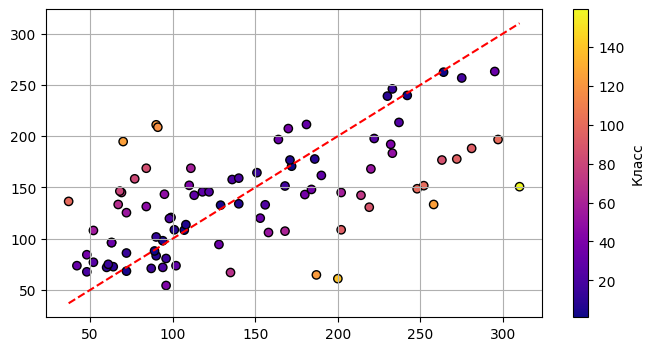

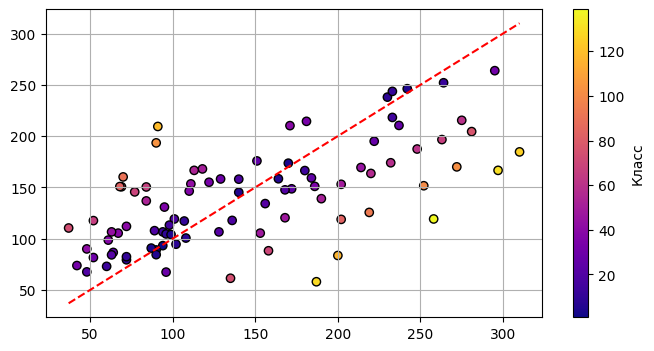

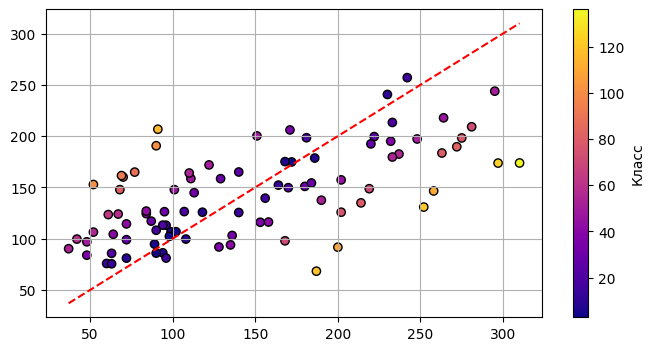

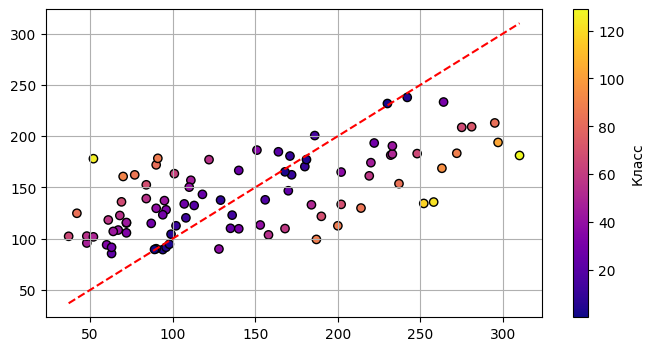

In [60]:
visualize_model(y_test, y_pred_3)
visualize_model(y_test, y_pred_5)
visualize_model(y_test, y_pred_10)
visualize_model(y_test, y_pred_30)


## Задача 3. Анализ влияния числа соседей

1 (1 балл). Изучите, как Accuracy (для классификации) или R² (для регрессии) зависит от k.  
2 (1 балл). Постройте график зависимости выбранной метрики от числа соседей.  
3 (1 балл). Сделайте вывод, как выбор k влияет на качество модели.


In [ ]:
# Сюда нужно написать код решения задачи